# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Introduction to Python (III) - Advanced topics

### <span style="color:red"> *PLEASE ENTER THIS CELL AND WRITE YOUR NAME HERE:*_____________________________ </span>

![logo](https://www.kozminski.edu.pl/fileadmin/_processed_/csm_logotypy_plaskie__kozminski_university_0430be3c25.png)
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

### References:
- Learn Python https://www.codecademy.com/learn/learn-python
- 10 Minutes to pandas
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- **the best tool to learn visualisations in Python** pandas_exercises https://github.com/guipsamora/pandas_exercises
- a library for data visualisations **seaborn**: https://seaborn.pydata.org/examples/index.html

---

Loading important libraries:
- numpy (Numerical Python / Numeric Python) - a package for performing scientific calculations
- pandas (Python Data Analysis Library) - a package for performing database operations
- matplotlib - the basic library for data visualization
- seaborn - a library for beautiful visualizations :)

# Data preparation, visualization, and analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Titanic
We will use the `titanic` dataset, which statistically (and mercilessly) describes the sad fate of passengers of a well-known passenger ship. This dataset is available in many places, but we will use the copy provided with the `seaborn` package. We need to load this package first:

In [3]:
import seaborn as sns
print("seaborn version:\n", sns.__version__)

seaborn version:
 0.10.0


We check the names of datasets available as part of `seaborn` (don't mind the red warning):

In [4]:
dataset_names = sns.get_dataset_names()
print(dataset_names)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [5]:
# we see that there are some datasets available - we are loading dataset titanic:
titanic = sns.load_dataset('titanic')

The dataset is loaded in the form of a DataFrame from the pandas package. If you have had contact with R - the name dataframe should be familiar to you. This is a table format in which we usually have separate variables in the columns and observations in the rows. You will learn the basic and a bit more advanced operations of DataFrames today so that you can better understand them through exploration before fitting the model data. <br><br>
You now have this dataframe in the titanic variable. The basic operation is to display the first few lines using the `.head()` method. In the next cell, execute the command `df.head()` where `df` is the name of the variable in which the dataframe is located:

In [6]:
# use the head method here
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [7]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [14]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

The `head` method allows you to specify one input argument - the number of rows displayed. Therefore:
```python
df.head (12)
```
allows displaying the first twelve lines of the `df` dataframe.
In the next cell, display the first 10 lines of our dataframe.

In [15]:
# here display the first 10 lines of our dataset
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


The Dataframe also has the `.columns` attribute which contains the names of all columns:

In [17]:
# write it here
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Similar to the numpy matrix, dataframes allow you to check the size using the `.shape` method:

In [18]:
# write it here
titanic.shape

(891, 15)

Complete the following sentence:
```
We learn that the dataframe has ........... columns and ................ rows.
```

Dataframe also lets you extract basic information from the data it contains. For example, we'll draw a boxplot showing the passenger age (`age`) broken down into ticket classes (`class`):

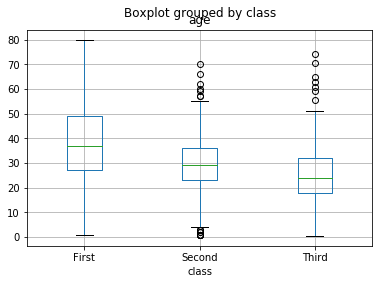

In [19]:
titanic.boxplot('age', by='class')

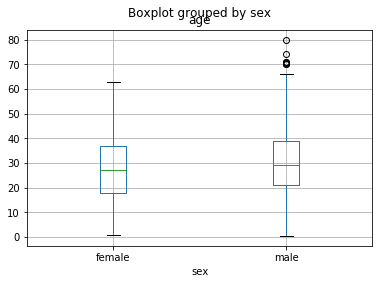

In [20]:
# now show the passenger age (`sex`) broken down into ticket classes (`class`):
titanic.boxplot('age', by='sex')

<div class="alert alert-block alert-success">
⚠️TASK 1 (DIFFICULT)
<br>

Please write a code that would present a distribution of age - sorted (from the lowest to the highest) - of people in this database. In order to do that, you need to use the `.sort_values()` and `value_counts()` methods. Use the `.plot()` method to plot the graph :)

</div>

In [7]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [8]:
titanic.age.sort_values().value_counts(sort=False)

0.75      2
1.00      7
2.00     10
3.00      6
4.00     10
         ..
0.67      1
0.83      2
0.92      1
70.50     1
0.42      1
Name: age, Length: 88, dtype: int64

Text(0, 0.5, 'The number of people in this age')

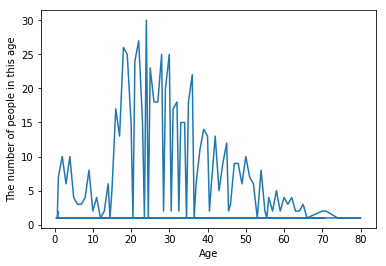

In [5]:
# write your code here:
titanic.age.sort_values().value_counts(sort=False).plot()

# leave these labels
plt.xlabel('Age')
plt.ylabel('The number of people in this age')

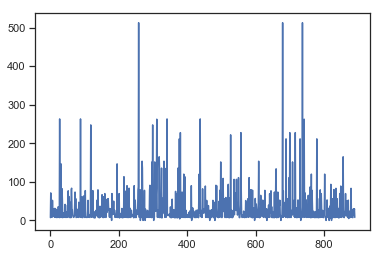

In [233]:
titanic.fare.plot()

Text(0, 0.5, 'Fare (Price)')

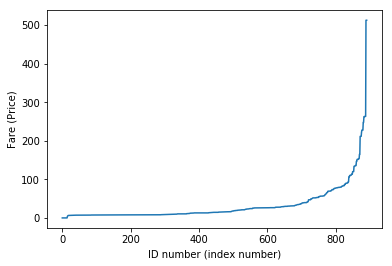

In [7]:
titanic.fare.sort_values().reset_index(drop=True).plot()

plt.xlabel('ID number (index number)')
plt.ylabel('Fare (Price)')

You can see above that most of the tickets' cost was below 100 (pounds(?)).

Similar charts can be made using the seaborn package (note the quite similar syntax):

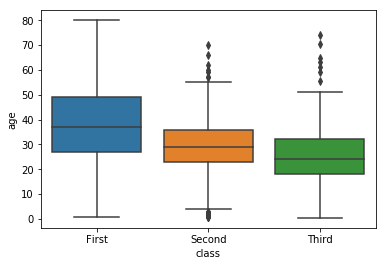

In [60]:
sns.boxplot('class', 'age', data=titanic)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


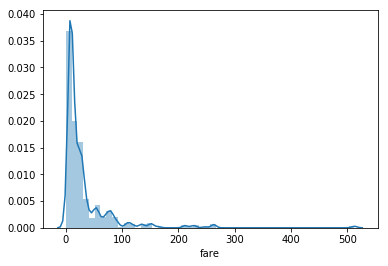

In [62]:
sns.distplot(titanic.fare)

Before proceeding further, think about the following:
* Do you understand what the boxplot chart shows? What is the line in the middle of the box, which part of the data is represented by the box and which represented the "whiskers"?
* What do we learn from the above charts?
* Do we see any relationship between the age and class in which the person travelled?

Seaborn also allows you to change the chart style (`set_style`) and the color palette used (`set_palette`), we will test it below:

In [63]:
sns.set_style('darkgrid')
sns.set_palette('deep')

Now copy to the cells below the code of both boxplot charts shown above (the first directly from the dataframe, the second using seaborn). You will see that the chart style will now be different:

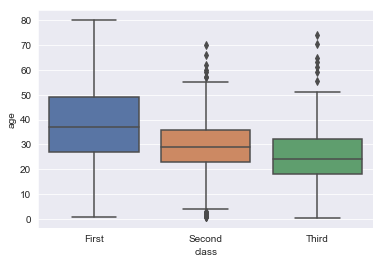

In [64]:
# first chart
sns.boxplot('class', 'age', data=titanic)

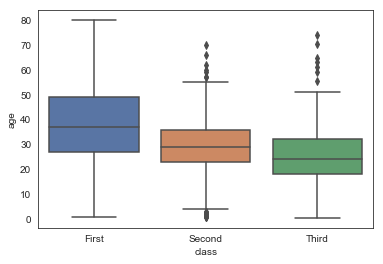

In [23]:
# second chart


In [65]:
# let's go back to a better style :)
sns.set(style="ticks")

In [72]:
sns.set_palette(sns.color_palette("Paired"))

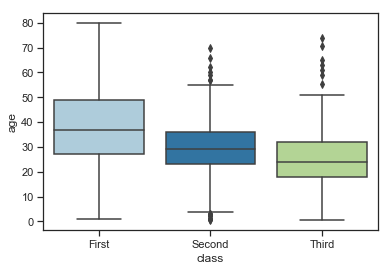

In [73]:
sns.boxplot('class', 'age', data=titanic)

## Operations on `dataframes`

Using the `.loc[]` method, we can select columns and rows of interest to us:

In [77]:
titanic.loc[:6, 'sex':'class']

,sex,age,sibsp,parch,fare,embarked,class
0,male,22.0,1,0,7.2500,S,Third
1,female,38.0,1,0,71.2833,C,First
2,female,26.0,0,0,7.9250,S,Third
3,female,35.0,1,0,53.1000,S,First
4,male,35.0,0,0,8.0500,S,Third
5,male,NaN,0,0,8.4583,Q,Third
6,male,54.0,0,0,51.8625,S,First


Note that unlike normal python indexing, the range `:6` has been treated together (along with the row labeled `6`), the same with the range of columns `'sex'`:`'class'` - both are included, so the last column is `'class'`.
The above operation selects a fragment of the original `titanic` dataframe - but due to the fact that we do not save this cut fragment in a variable, it is only displayed in the output.

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Below, in a similar way, select rows 10 to 18 from the dataframe and columns from `'fare'` to `'deck'`:

</div>

In [78]:
titanic.loc[10:18, 'fare':'deck']

,fare,embarked,class,who,adult_male,deck
10,16.7000,S,Third,child,False,G
11,26.5500,S,First,woman,False,C
12,8.0500,S,Third,man,True,NaN
13,31.2750,S,Third,man,True,NaN
14,7.8542,S,Third,child,False,NaN
15,16.0000,S,Second,woman,False,NaN
16,29.1250,Q,Third,child,False,NaN
17,13.0000,S,Second,man,True,NaN
18,18.0000,S,Third,woman,False,NaN


If you want to select all columns, you can enter a colon as the second argument in `loc`

In [24]:
titanic.loc[111:113, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
112,0,3,male,22.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False


In [25]:
titanic.loc[111:113, ['sex', 'fare']]

,sex,fare
111,female,14.4542
112,male,8.0500
113,female,9.8250


We can also not specify the last column in the column range (second argument in `loc`), then the columns from the one given by us to the last will be selected:

In [26]:
titanic.loc[111:113, 'who':]

,who,adult_male,deck,embark_town,alive,alone
111,child,False,NaN,Cherbourg,no,False
112,man,True,NaN,Southampton,no,True
113,woman,False,NaN,Southampton,no,False


In the case of this dataset, we will be interested if the passenger survived the unfortunate voyage of the ship.
This information can be found in the `survived` column. We can get to the dataframe column (besides the `loc` method) in a simple way:

In [236]:
titanic.age[0]

22.0

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Please display survival information for the first 5 people (not using the `loc` or `iloc` method)

</div>

In [80]:
titanic[:5].survived

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

OR

In [81]:
titanic.survived.head(5)

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

OR

In [84]:
titanic.survived[:5]

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Please display survival information for the first 5 people (**using** the `loc` method)

</div>

In [87]:
titanic.loc[:4, 'survived']

# PLEASE NOTICE THAT WE USE `4` AND NOT `5`! This is because you use labels not positions in `.loc[]` method.

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [88]:
type(titanic.loc[:4, 'survived'])

pandas.core.series.Series

Note that we get the **column along with the row labels (index)**. In addition, we used the normal Python indexing, so we got the first 5 rows regardless of their labels (by the way - row labels do not have to be numbers in pandas, they can be e.g. strings or words, there is a lot of freedom here).
In a situation where we do not want to get a `pandas` column with row labels as above, but the numpy vector itself, we can add to the attribute `.values`:

In [238]:
titanic.survived[:5].values

array([0, 1, 1, 1, 0], dtype=int64)

Columns (and even entire dataframes) support various mathematical operations such as e.g. average. If we want to find out how many people survived the cruise ship percentage, we can address the `survived` column and then take its average (`.mean()` method):

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

Please display the average survival rate.

</div>

In [92]:
titanic.survived.mean()

0.3838383838383838

OR

In [93]:
np.mean(titanic.survived)

0.3838383838383838

Unfortunately, only about three-eighth passengers survived the journey.
What determined the survival or death of individual passengers? Gender, age, ticket price, class, traveling with other people? We will try to answer these questions in today's classe using logistic regression - the model we discussed in the last year.

<div class="alert alert-block alert-success">
⚠️TASKS 6-10 (below you have exercises 1, 2, and 5 DONE!)
<br>

## Exercises
However, before we move on to data mining, a few exercises to better master the use of `pandas`:
1. check the average age of passengers
2. check what percentage of the first 100 passengers survived the journey
3. use the `.unique()` method on the `titanic.who` column to learn the unique (non-duplicate) values of this column
     <br> 3.1. you can also easily check a specific number of unique values by using the `.value_counts()` method (if you add the `(dropna = False)` parameter, we will also know the amount of missing data in a specific column)
4. draw a ticket price histogram using the `.hist()` method of the appropriate column
5. The `.hist()` method accepts many additional arguments, use the `bins` name argument to draw the same histogram as in step 4, but consisting of 35 bins.

</div>

In [94]:
# exe 1
titanic.age.mean()

29.69911764705882

In [101]:
# exe 2
titanic.survived[0:100].mean()

0.41

In [60]:
# exe 3
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

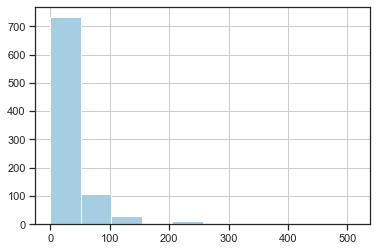

In [61]:
# exe 4
titanic.fare.hist()

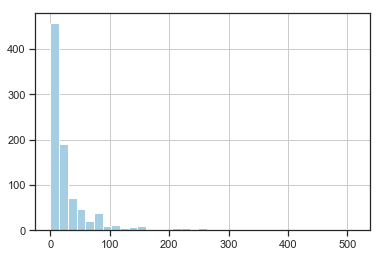

In [115]:
# exe 5
titanic.fare.hist(bins=35)

## The number of people above 20 years old.

In [113]:
np.mean(titanic.age > 20)

0.6004489337822672

In [112]:
titanic[titanic.age > 20].shape[0] / titanic.shape[0]

0.6004489337822672

## Back to data mining

We are interested in how many people survived depending on the class, but first let's see how many passengers traveled in each class. We will use the `countplot` function of the` seaborn` package for this:

In [116]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

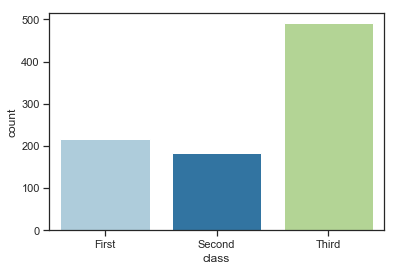

In [117]:
# write the code here
sns.countplot('class', data=titanic)

<div class="alert alert-block alert-success">
⚠️TASK 11
<br>

We see that most people traveled in third class. Now let's see how many people survived (the `survived` column) in each class (the` class` column). We will use the same function as above, but this time the first argument will be the name of the column describing survival. In addition, we will use the argument `hue` and give it the name of the column broken down into which we want to see on the chart (we want to see the survival broken down into classes). As a result, on one side of the chart we will have survivors, and on the other those who died, and each of these categories will be divided into colored bars representing the class.<br>
If you have any problems, go ahead and ask the teacher for the answer.

</div>

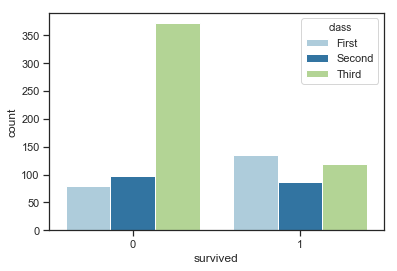

In [122]:
# write the code here
sns.countplot('survived', hue='class', data=titanic)

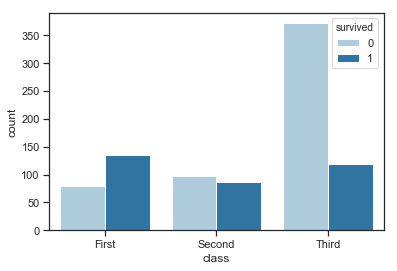

In [123]:
# write the code here
sns.countplot('class', hue='survived', data=titanic)

<div class="alert alert-block alert-success">
⚠️TASK 12 (DIFFICULT a bit)
<br>

If you do not want to have numbers (1, 0) on your graph, but words (died, survived), you should use a column that has text, e.g. column `alive`. The problem is that this column has text `yes, no`, while we want it to have `died, survived`. <br><br>
How can you change these values in your database? Check that either in our previous jupyter notebooks, or look for it on stackoverflow.


</div>

In [128]:
titanic.loc[:, 'new_alive'] = titanic.alive.map({'no':'died', 'yes':'survived'})

In [131]:
titanic.alive.map({'no':'died', 'yes':'survived'}).shape

(891,)

In [132]:
titanic.shape

(891, 16)

OR you can do the above step by step:

In [133]:
new_column = titanic.alive.map({'no':'died', 'yes':'survived'})

In [137]:
titanic.loc[:, 'new_alive2'] = new_column

In [138]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'new_alive', 'new_alive2'],
      dtype='object')

In [139]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_alive,new_alive2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,died,died
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,survived,survived


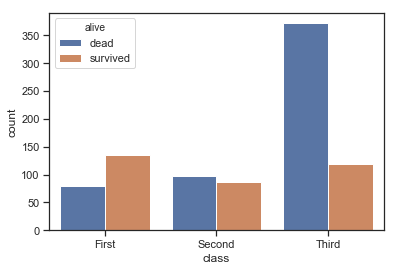

In [43]:
# here draw the graph
sns.countplot('class', hue='new_alive', data=titanic)

Now swap the names of the columns on your graph (the one which is the first argument of `sns.countplot` and the one you give in the name argument` hue`), i.e. create a graph of the number of people who survived/died in different classes. Note the differences from the previous chart. Which one do you think is clearer or more comprehensible and why?

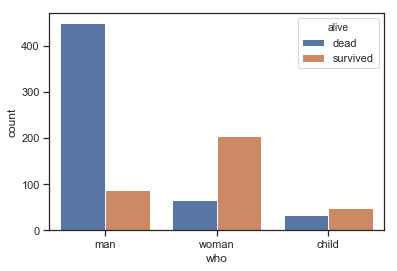

In [49]:
# here draw the graph
sns.countplot('new_alive', hue='class', data=titanic)

However, we want to see the survival in percentage terms for each class. First, we will try to select separately
first and third class passengers and see how many percent of them survived. The method is very useful for data selection:
`.query()` - it allows you to pass the selection condition as a string and returns data matching this condition. For example, if we want to create a separate dataframe containing information only about passengers aged 60 and over, we would do it like this:
```Python
older_titanic = titanic.query('age > 60')
```


In [51]:
# check the above code here. Visualise the new dataframe and look through it
older_titanic = titanic.query('age > 60')
sns.countplot('new_alive', hue='class', data=older_titanic)

<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Similarly, select passengers belonging to a given class. Use the `pclass` column describing the class number
(i.e. containing a numeric value corresponding to the textual description in the `class` column)<br><br>
Create 3 separate dataframes having only passengers from each class. Name the new variables `df_first`, `df_second`, `df_third`.

</div>

In [ ]:
df_first = titanic.query("pclass == 1")
df_second = titanic.query("pclass == 2")
df_third = titanic.query("pclass == 3")
sns.countplot('new_alive', hue='class', data=df_first)

To find out how many first-class passengers survived the journey, all we have to do is perform the average operation on the `survived` dataframe column` df_first`. Similarly for third class passengers.
Perform this operation on both dataframes (containing one selected class) and compare what percentage of passengers survived depending on the class.

In [53]:
print(df_first.survived.mean())
print(df_second.survived.mean())
print(df_third.survived.mean())

0.6296296296296297

Pandas also makes this comparison easier to use, using the `groupby` method, which allows splitting a dataframe according to a given category. If we want to divide the dataframe into classes, we will write `titanic.groupby('class')`. Then, when we get to the `survived` column and perform the average on it, we will see the average survival rate (percentage of passengers who survived the journey) was broken down by class:

In [55]:
titanic.groupby('class').survived.mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

<div class="alert alert-block alert-success">
⚠️TASK 14
<br>

Let's now use the `sns.factorplot` function to present the ticket class on the x axis and the survival on the y axis. With color (`hue =`) we want to have separate lines marked for the passenger role (`who`), the data is of course our dataframe `titanic`.
<br><br>
How would you interpret the graph?

</div>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


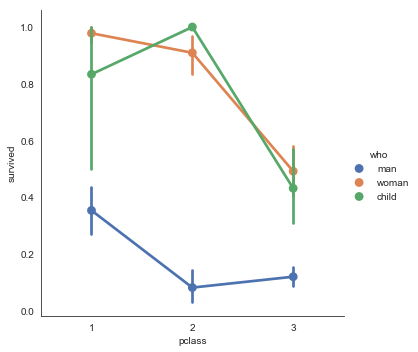

In [70]:
sns.factorplot("class",'survived', hue = 'who', data = titanic)

# TASKS

Please download data from this page: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
I've really done it for you below, so just run the code:

In [9]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [10]:
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


<div class="alert alert-block alert-success">
⚠️TASK 16
<br>

1. check how many unique occupations are there in the database
2. what is the average age of women and what is men?
3. in which occupation the proportion of women is the highest, and in which the lowest?

</div>

In [133]:
#1
users.occupation.value_counts().count()

21

In [134]:
# 2
users.groupby('gender').age.mean()

gender
F    33.813187
M    34.149254
Name: age, dtype: float64

In [135]:
# 3
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [165]:
women = users.loc[users['gender'] == "F"].occupation.value_counts()
total = users.occupation.value_counts()

proportion = women/total
proportion.sort_values(ascending = False, inplace = True)

print(proportion)

homemaker        0.857143
healthcare       0.687500
librarian        0.568627
artist           0.464286
administrator    0.455696
none             0.444444
writer           0.422222
marketing        0.384615
other            0.342857
student          0.306122
educator         0.273684
salesman         0.250000
lawyer           0.166667
entertainment    0.111111
scientist        0.096774
executive        0.093750
programmer       0.090909
retired          0.071429
technician       0.037037
engineer         0.029851
doctor                NaN
Name: occupation, dtype: float64
